In [34]:
import geopandas as gpd
import geoplot

import pandas as pd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import os
import datetime
import sys

In [33]:
weather_data_path = os.path.join('./data','nyc','weather','request_results.csv')
weather_data = pd.read_csv(weather_data_path)

In [4]:
weather_data

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,AWND,DAPR,MDPR,PGTM,...,WSF5,WT01,WT02,WT03,WT04,WT05,WT06,WT08,WT09,WT11
0,USC00280907,"BOONTON 1 SE, NJ US",40.89174,-74.39635,85.3,2020-01-01,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USC00280907,"BOONTON 1 SE, NJ US",40.89174,-74.39635,85.3,2020-01-02,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USC00280907,"BOONTON 1 SE, NJ US",40.89174,-74.39635,85.3,2020-01-03,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USC00280907,"BOONTON 1 SE, NJ US",40.89174,-74.39635,85.3,2020-01-04,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USC00280907,"BOONTON 1 SE, NJ US",40.89174,-74.39635,85.3,2020-01-05,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31583,USW00054743,"CALDWELL ESSEX CO AIRPORT, NJ US",40.87645,-74.28284,52.0,2020-12-27,1.1,NaN,NaN,1334.0,...,6.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31584,USW00054743,"CALDWELL ESSEX CO AIRPORT, NJ US",40.87645,-74.28284,52.0,2020-12-28,1.3,NaN,NaN,1215.0,...,8.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31585,USW00054743,"CALDWELL ESSEX CO AIRPORT, NJ US",40.87645,-74.28284,52.0,2020-12-29,3.7,NaN,NaN,1039.0,...,16.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31586,USW00054743,"CALDWELL ESSEX CO AIRPORT, NJ US",40.87645,-74.28284,52.0,2020-12-30,1.5,NaN,NaN,1455.0,...,7.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
weather_data['DATE'] = pd.to_datetime(weather_data['DATE'])

In [16]:
stations = weather_data.drop_duplicates(keep='first', subset='STATION')

In [22]:
stations_geo = gpd.GeoDataFrame(
    stations, geometry=gpd.points_from_xy(stations.LONGITUDE, stations.LATITUDE))

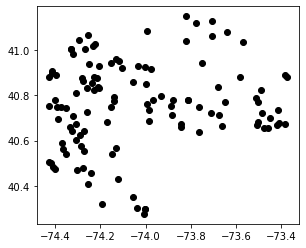

In [27]:
stations_geo.plot(color='black')
plt.show()

In [29]:
## For reference, I want to plot these on top of the council regions
council_footprints = gpd.read_file('./data/nyc/footprints/council_districts.geojson')

In [35]:
boroughs = gpd.read_file(
    geoplot.datasets.get_path('nyc_boroughs')
)

In [36]:
boroughs

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330385.03697,1.623853e+09,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ..."
1,4,Queens,861038.47930,3.049947e+09,"MULTIPOLYGON (((-73.83668 40.59495, -73.83678 ..."
2,3,Brooklyn,726568.94634,1.959432e+09,"MULTIPOLYGON (((-73.86706 40.58209, -73.86769 ..."
3,1,Manhattan,358532.95642,6.364422e+08,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ..."
4,2,Bronx,464517.89055,1.186804e+09,"MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ..."


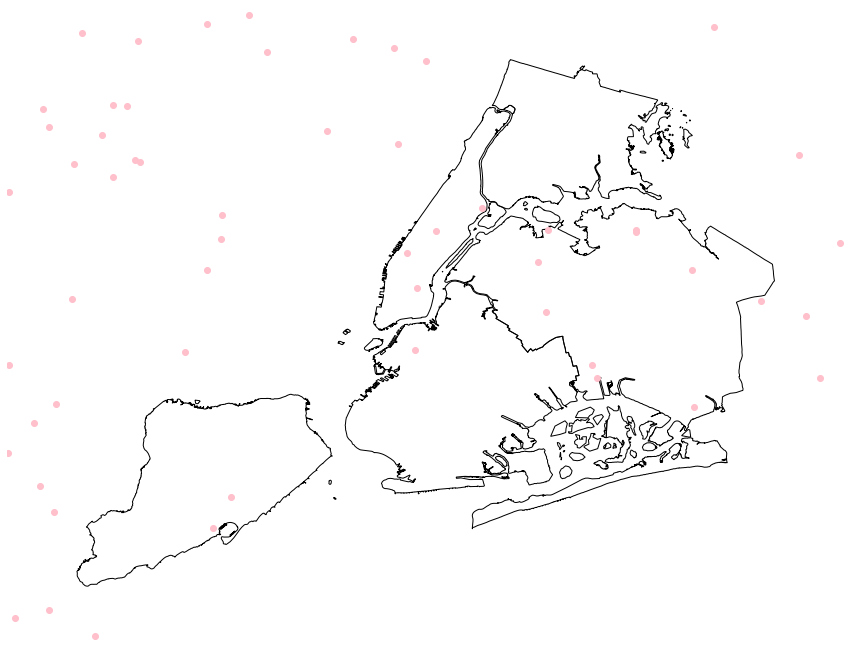

In [48]:
ax = geoplot.polyplot(boroughs, figsize=(15,15))
stations_geo.plot(color='pink', ax=ax)
plt.show()


<AxesSubplot:>

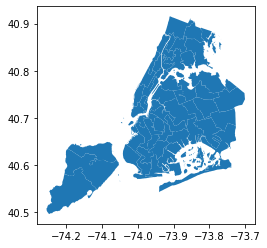

In [30]:
plt.figure(figsize=(1,1))
council_footprints.plot()

In [28]:
stations_geo

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,AWND,DAPR,MDPR,PGTM,...,WT01,WT02,WT03,WT04,WT05,WT06,WT08,WT09,WT11,geometry
0,USC00280907,"BOONTON 1 SE, NJ US",40.891740,-74.396350,85.3,2020-01-01,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-74.39635 40.89174)
364,US1NJMD0086,"HIGHLAND PARK 0.4 N, NJ US",40.505420,-74.429780,14.9,2020-01-01,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-74.42978 40.50542)
719,US1NJMN0048,"LONG BRANCH 0.5 W, NJ US",40.296952,-74.001510,7.9,2020-01-01,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-74.00151 40.29695)
1085,US1NJMD0088,"METUCHEN 3.3 N, NJ US",40.588840,-74.372120,27.4,2020-01-01,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-74.37212 40.58884)
1418,US1NJPS0040,"POMPTON LAKES 1.0 ENE, NJ US",41.006785,-74.266384,89.0,2020-01-01,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-74.26638 41.00679)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30422,US1NJUN0003,"LINDEN 2.2 NW, NJ US",40.641210,-74.272595,19.8,2020-01-01,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-74.27259 40.64121)
30743,US1NYNS0016,"MASSAPEQUA 0.9 SSW, NY US",40.655156,-73.475584,2.4,2020-03-13,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-73.47558 40.65516)
30786,US1NYNS0018,"HICKSVILLE 1.3 ENE, NY US",40.768654,-73.501701,45.7,2020-01-01,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-73.50170 40.76865)
31130,US1NYWC0019,"ELMSFORD 0.8 SSW, NY US",41.042666,-73.822799,90.5,2020-01-01,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-73.82280 41.04267)
